# Multiple loads with DR and different allowable time testing

In [1]:
import numpy as np
from All_MILP import All_MILP
import matplotlib.pyplot as plt

## Test Case 1

Optimize a model with 615 rows, 500 columns and 3726 nonzeros
Variable types: 340 continuous, 160 integer (160 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+01, 4e+03]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 1e+07]
Presolve removed 577 rows and 480 columns
Presolve time: 0.04s
Presolved: 38 rows, 20 columns, 418 nonzeros
Variable types: 20 continuous, 0 integer (0 binary)

Root relaxation: objective 7.286510e+04, 19 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    72865.104000 72865.1040  0.00%     -    0s

Explored 0 nodes (19 simplex iterations) in 0.10 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 72865.1 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.286510400000e+04, best bound 7.286510400000e+04, gap 0.0000%
Total Co

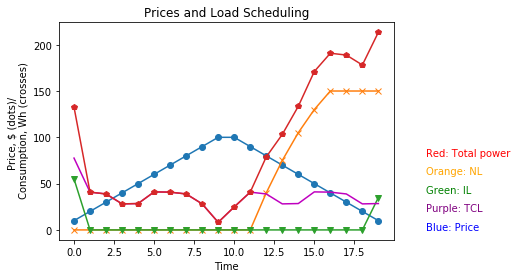

In [2]:
# Parameter Setting
# For All
pr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
dt = 10
Energy_DR = 100000000
DR_b = 15
DR_e = 19
# For NL
L = np.array([4, 5, 6, 7, 8])
P_NL = np.array([20, 25, 30, 35, 40])
NL_b = np.array([0, 0, 0, 0, 0])
NL_e = np.array([19, 19, 19, 19, 19])
# For IL
P_IL = np.array([20, 25, 30])
E_IL = np.array([200, 300, 400])
T_off = np.array([2, 3, 4])
Pmin = 0.2 * P_IL
IL_b = np.array([0, 0, 0])
IL_e = np.array([19, 19, 19])
# For TCL
P_TCL = np.array([10, 20, 30, 40, 50])
c_water = 0.073
mass = np.array([50, 50, 50, 50, 50])
temp_up = np.array([25, 40, 45, 50, 50])
temp_o = np.array([20, 25, 20, 20, 25])
temp_req = np.array([60, 60, 70, 70, 75])
temp_en = np.array([[25, 20, 18, 15, 15, 25, 20, 18, 15, 15, 25, 20, 18, 15, 15, 25, 20, 18, 15, 15],
                    [20, 25, 30, 35, 40, 20, 25, 30, 35, 40, 20, 25, 30, 35, 40, 20, 25, 30, 35, 40],
                    [15, 18, 25, 30, 40, 15, 18, 25, 30, 40, 15, 18, 25, 30, 40, 15, 18, 25, 30, 40],
                    [22, 35, 38, 40, 42, 22, 35, 38, 40, 42, 22, 35, 38, 40, 42, 22, 35, 38, 40, 42],
                    [28, 30, 34, 40, 42, 28, 30, 34, 40, 42, 28, 30, 34, 40, 42, 28, 30, 34, 40, 42]])
di = np.array(
    [[25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25]])

# MILP Solution
solution = All_MILP(pr, dt, Energy_DR, DR_b, DR_e, L, P_NL, NL_b, NL_e, P_IL, E_IL, T_off, Pmin, IL_b, IL_e, P_TCL, c_water, mass, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()
ax.plot(pr, 'o-')
ax.plot(solution[0], 'x-') # Total Power consumed by NL
ax.plot(solution[1], 'v-') # Total Power consumed by IL
ax.plot(solution[2], 'm-') # Total Power consumed by TCL
ax.plot(solution[3], 'p-') # Total Power consumed by ALL
ax.text(22,0,'Blue: Price',color='blue')
ax.text(22,20,'Purple: TCL',color='purple')
ax.text(22,40,'Green: IL',color='green')
ax.text(22,60,'Orange: NL',color='orange')
ax.text(22,80,'Red: Total power',color='red')
ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ (dots)/ \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

## Test Case 2

Optimize a model with 615 rows, 500 columns and 3726 nonzeros
Variable types: 340 continuous, 160 integer (160 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+01, 4e+03]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 2e+03]
Presolve removed 163 rows and 87 columns
Presolve time: 0.02s
Presolved: 452 rows, 413 columns, 2995 nonzeros
Variable types: 253 continuous, 160 integer (160 binary)

Root relaxation: objective 7.304647e+04, 122 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 73046.4710    0    7          - 73046.4710      -     -    0s
H    0     0                    73287.836000 73046.4710  0.33%     -    0s
     0     0     cutoff    0      73287.8360 73287.8360  0.00%     -    0s

Cutting planes:
  Gomory: 2
  Flow cover: 4

Explored 1 nodes (137 simplex iterations) in 0.10 seconds
Th

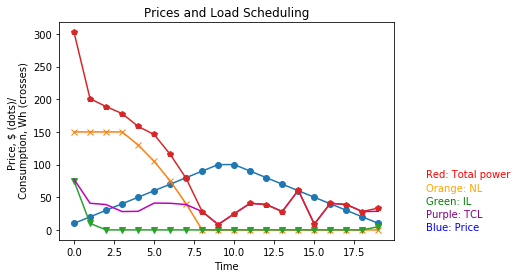

In [3]:
# Parameter Setting
# For All
pr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
dt = 10
Energy_DR = 1500
DR_b = 15
DR_e = 19
# For NL
L = np.array([4, 5, 6, 7, 8])
P_NL = np.array([20, 25, 30, 35, 40])
NL_b = np.array([0, 0, 0, 0, 0])
NL_e = np.array([19, 19, 19, 19, 19])
# For IL
P_IL = np.array([20, 25, 30])
E_IL = np.array([200, 300, 400])
T_off = np.array([2, 3, 4])
Pmin = 0.2 * P_IL
IL_b = np.array([0, 0, 0])
IL_e = np.array([19, 19, 19])
# For TCL
P_TCL = np.array([10, 20, 30, 40, 50])
c_water = 0.073
mass = np.array([50, 50, 50, 50, 50])
temp_up = np.array([25, 40, 45, 50, 50])
temp_o = np.array([20, 25, 20, 20, 25])
temp_req = np.array([60, 60, 70, 70, 75])
temp_en = np.array([[25, 20, 18, 15, 15, 25, 20, 18, 15, 15, 25, 20, 18, 15, 15, 25, 20, 18, 15, 15],
                    [20, 25, 30, 35, 40, 20, 25, 30, 35, 40, 20, 25, 30, 35, 40, 20, 25, 30, 35, 40],
                    [15, 18, 25, 30, 40, 15, 18, 25, 30, 40, 15, 18, 25, 30, 40, 15, 18, 25, 30, 40],
                    [22, 35, 38, 40, 42, 22, 35, 38, 40, 42, 22, 35, 38, 40, 42, 22, 35, 38, 40, 42],
                    [28, 30, 34, 40, 42, 28, 30, 34, 40, 42, 28, 30, 34, 40, 42, 28, 30, 34, 40, 42]])
di = np.array(
    [[25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25]])

# MILP Solution
solution = All_MILP(pr, dt, Energy_DR, DR_b, DR_e, L, P_NL, NL_b, NL_e, P_IL, E_IL, T_off, Pmin, IL_b, IL_e, P_TCL, c_water, mass, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()
ax.plot(pr, 'o-')
ax.plot(solution[0], 'x-') # Total Power consumed by NL
ax.plot(solution[1], 'v-') # Total Power consumed by IL
ax.plot(solution[2], 'm-') # Total Power consumed by TCL
ax.plot(solution[3], 'p-') # Total Power consumed by ALL
ax.text(22,0,'Blue: Price',color='blue')
ax.text(22,20,'Purple: TCL',color='purple')
ax.text(22,40,'Green: IL',color='green')
ax.text(22,60,'Orange: NL',color='orange')
ax.text(22,80,'Red: Total power',color='red')
ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ (dots)/ \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

## Test Case 3

Optimize a model with 630 rows, 500 columns and 3741 nonzeros
Variable types: 340 continuous, 160 integer (160 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+01, 4e+03]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 2e+03]
Presolve removed 244 rows and 147 columns
Presolve time: 0.02s
Presolved: 386 rows, 353 columns, 2782 nonzeros
Variable types: 208 continuous, 145 integer (145 binary)

Root relaxation: objective 7.670425e+04, 139 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 76704.2460    0    3          - 76704.2460      -     -    0s
H    0     0                    76796.514000 76704.2460  0.12%     -    0s
     0     0 76707.9533    0    2 76796.5140 76707.9533  0.12%     -    0s
     0     0 76707.9533    0    1 76796.5140 76707.9533  0.12%     -    0s
     0     0 76713.0852    0  

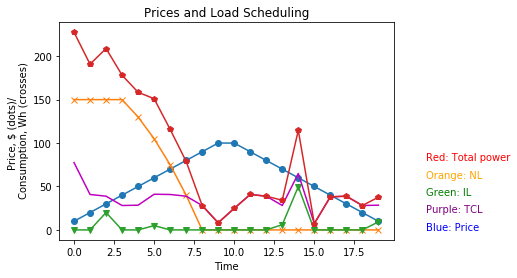

In [4]:
# Parameter Setting
# For All
pr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
dt = 10
Energy_DR = 1500
DR_b = 15
DR_e = 19
# For NL
L = np.array([4, 5, 6, 7, 8])
P_NL = np.array([20, 25, 30, 35, 40])
NL_b = np.array([0, 0, 0, 0, 0])
NL_e = np.array([19, 19, 19, 19, 19])
# For IL
P_IL = np.array([20, 25, 30])
E_IL = np.array([200, 300, 400])
T_off = np.array([2, 3, 4])
Pmin = 0.2 * P_IL
IL_b = np.array([2, 5, 8])
IL_e = np.array([19, 19, 19])
# For TCL
P_TCL = np.array([10, 20, 30, 40, 50])
c_water = 0.073
mass = np.array([50, 50, 50, 50, 50])
temp_up = np.array([25, 40, 45, 50, 50])
temp_o = np.array([20, 25, 20, 20, 25])
temp_req = np.array([60, 60, 70, 70, 75])
temp_en = np.array([[25, 20, 18, 15, 15, 25, 20, 18, 15, 15, 25, 20, 18, 15, 15, 25, 20, 18, 15, 15],
                    [20, 25, 30, 35, 40, 20, 25, 30, 35, 40, 20, 25, 30, 35, 40, 20, 25, 30, 35, 40],
                    [15, 18, 25, 30, 40, 15, 18, 25, 30, 40, 15, 18, 25, 30, 40, 15, 18, 25, 30, 40],
                    [22, 35, 38, 40, 42, 22, 35, 38, 40, 42, 22, 35, 38, 40, 42, 22, 35, 38, 40, 42],
                    [28, 30, 34, 40, 42, 28, 30, 34, 40, 42, 28, 30, 34, 40, 42, 28, 30, 34, 40, 42]])
di = np.array(
    [[25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25],
     [25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25, 25, 27, 28, 22, 25]])

# MILP Solution
solution = All_MILP(pr, dt, Energy_DR, DR_b, DR_e, L, P_NL, NL_b, NL_e, P_IL, E_IL, T_off, Pmin, IL_b, IL_e, P_TCL, c_water, mass, temp_up, temp_o, temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()
ax.plot(pr, 'o-')
ax.plot(solution[0], 'x-') # Total Power consumed by NL
ax.plot(solution[1], 'v-') # Total Power consumed by IL
ax.plot(solution[2], 'm-') # Total Power consumed by TCL
ax.plot(solution[3], 'p-') # Total Power consumed by ALL
ax.text(22,0,'Blue: Price',color='blue')
ax.text(22,20,'Purple: TCL',color='purple')
ax.text(22,40,'Green: IL',color='green')
ax.text(22,60,'Orange: NL',color='orange')
ax.text(22,80,'Red: Total power',color='red')
ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ (dots)/ \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

### Description:


In these three cases, for each, there are 20 time steps, 5 NL, 3 IL and 5 TCL. These three are used for comparison. 

1. Test Case 1 is the most loose one as DR(demand response) is too huge to constraint anything; allowable time for all loads are the whole time range which also restricts nothing;
2. Test Case 2 adds DR within a small range and with a meaningful value;
3. Test Case 3 adds allowable time for all IL, based on Test Case 2.

### Results:

1. Total Cost: C1: 72865.10399999998; C2: 73287.83599999998; C3:76756.51399999994
2. After being presolved: C1: Variable types: 20 continuous, 0 integer (0 binary); C2:Variable types: 253 continuous, 160 integer (160 binary); C3:Variable types: 208 continuous, 145 integer (145 binary)
3. Time taken: C1: Explored 0 nodes (19 simplex iterations) in 0.10 seconds; C2: Explored 1 nodes (137 simplex iterations) in 0.10 seconds; C3: Explored 1 nodes (257 simplex iterations) in 0.19 seconds.